# Hands-on Activity 9.2 Customized Visualizations using Seaborn

---

**Name**: Corpuz, Micki Laurren B.

**Section**: CPE22S3

**Submitted to**: Engr. Roman Richard

---

## **Instructions**

- Create **a Python notebook** to answer all shown procedures, exercises and analysis in this section.

## **Resources**

- Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csv

## **Procedures**

- 9.4 Introduction to Seaborn
- 9.5 Formatting Plots
- 9.6 Customizing Visualizations

### **Introduction to Seaborn**

**About the Data**

In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the stock_analysis package)
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)


**Setup**

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('earthquakes.csv')

#### **Categorical data**
A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand
what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.

In [25]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

mag magType                      place  tsunami  \
time                                                                       
2018-09-28 10:02:43.480  7.5     mww  78km N of Palu, Indonesia        1   

                        parsed_place  
time                                  
2018-09-28 10:02:43.480    Indonesia

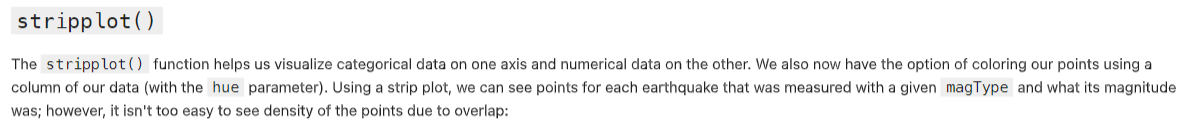

<Axes: xlabel='magType', ylabel='mag'>

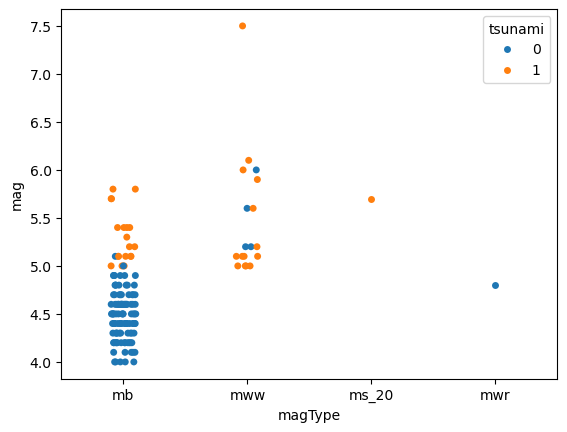

In [28]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

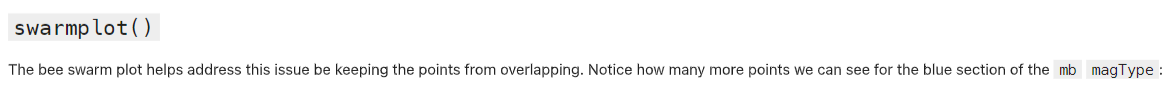

<Axes: xlabel='magType', ylabel='mag'>

C:\Users\micki\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


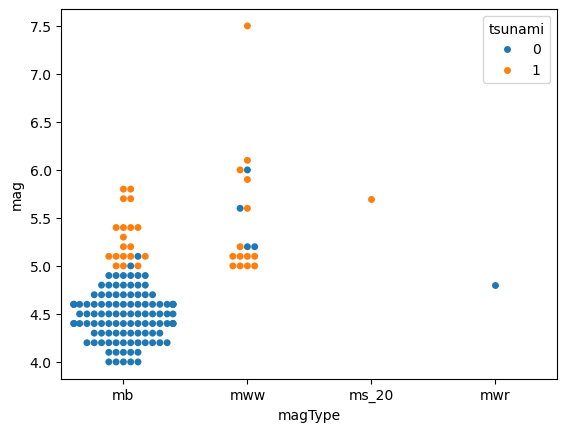

In [30]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

#### **Correlation and Heatmaps**


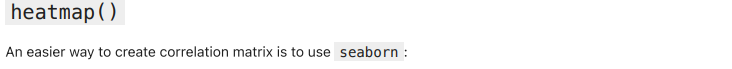

<Axes: >

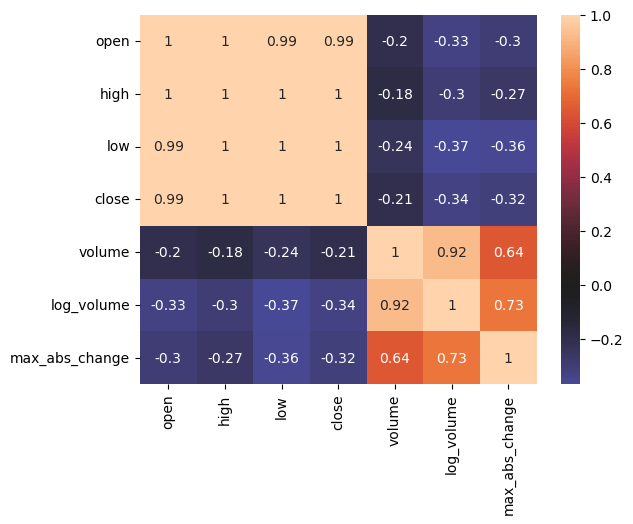

In [34]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr(),
    annot=True, center=0
)

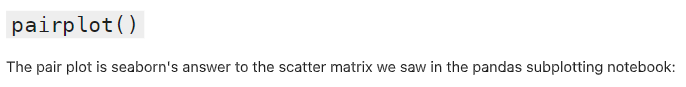

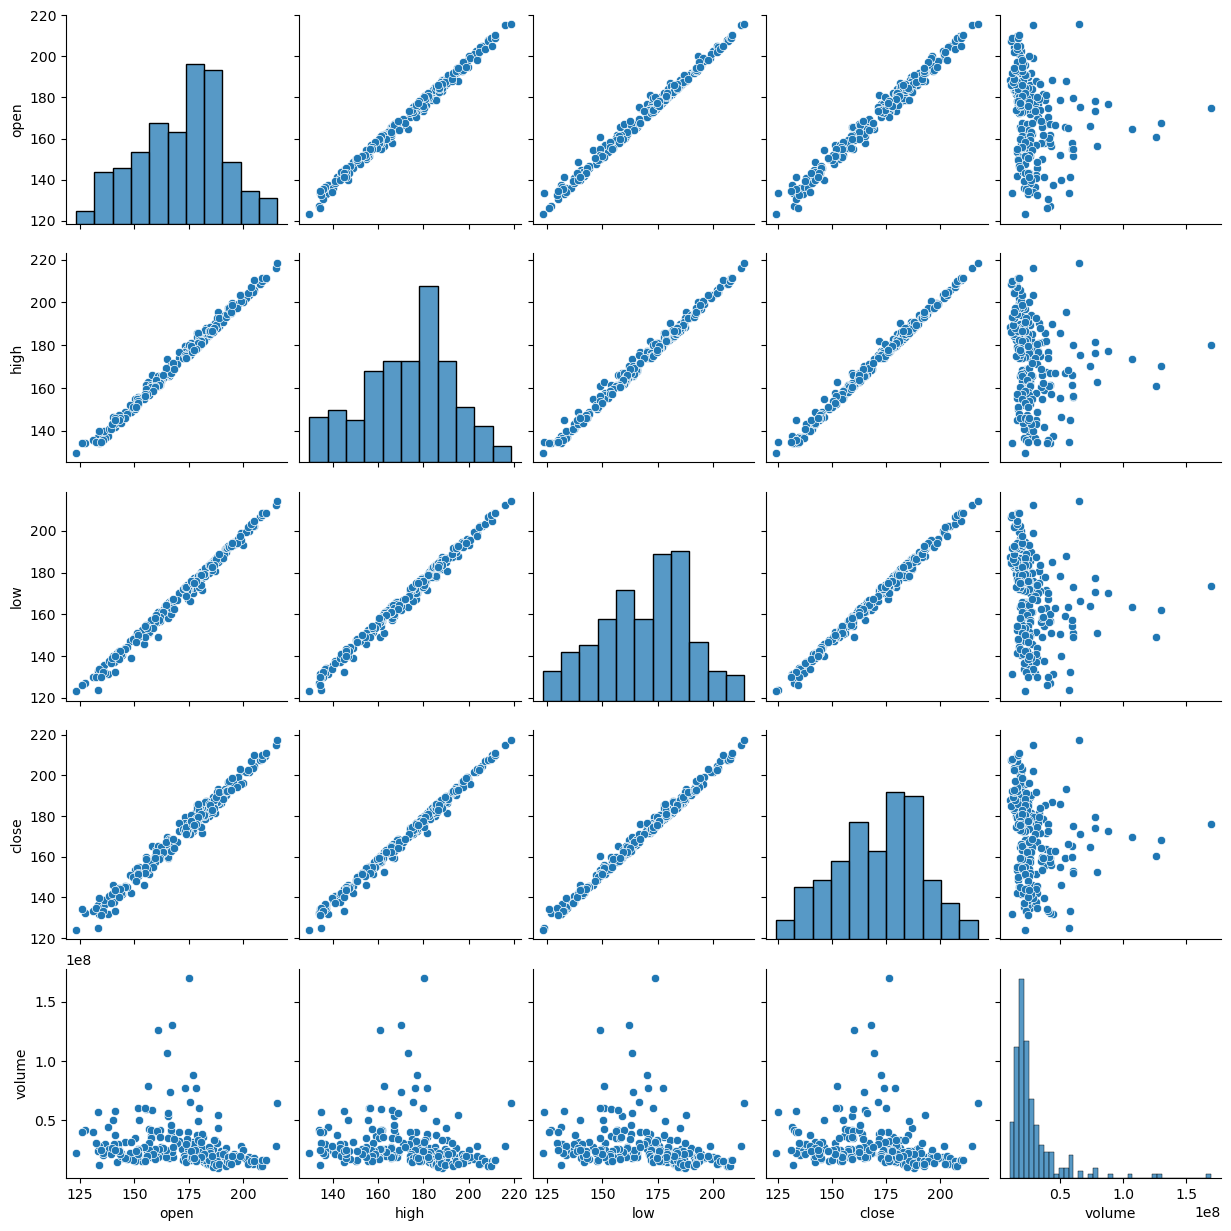

In [36]:
sns.pairplot(fb)

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the
same shape):

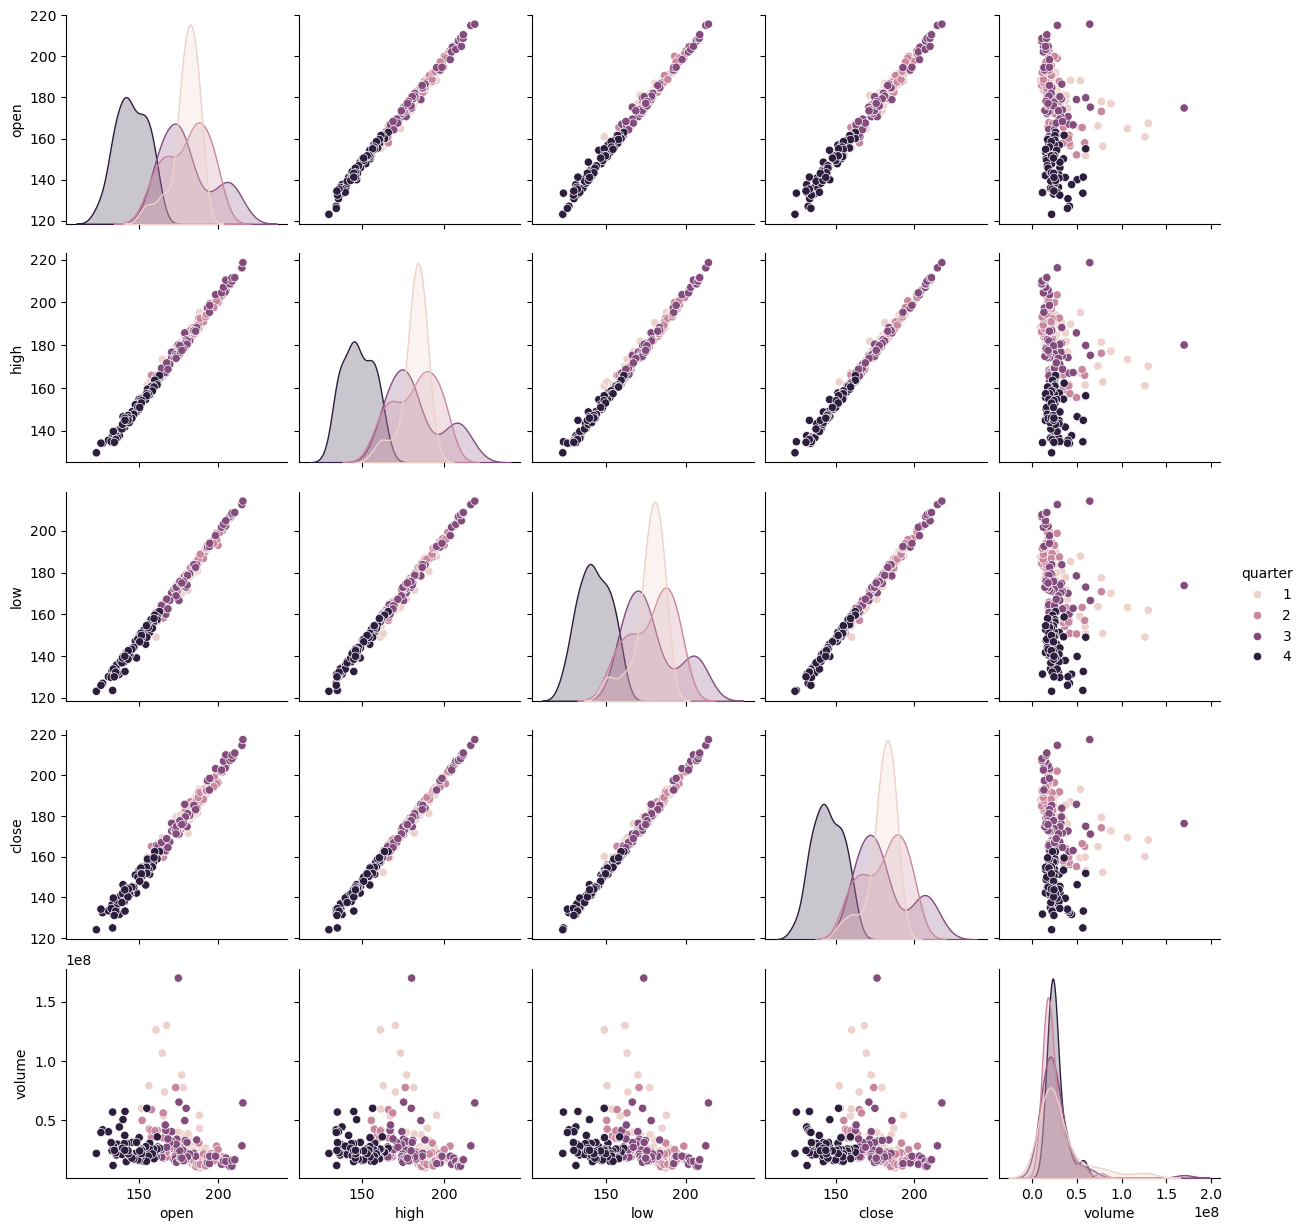

In [38]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

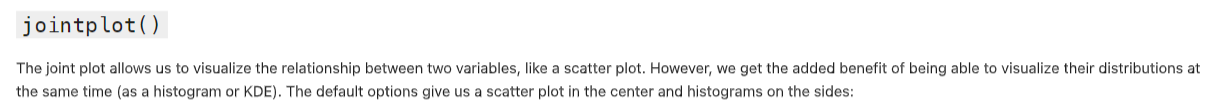

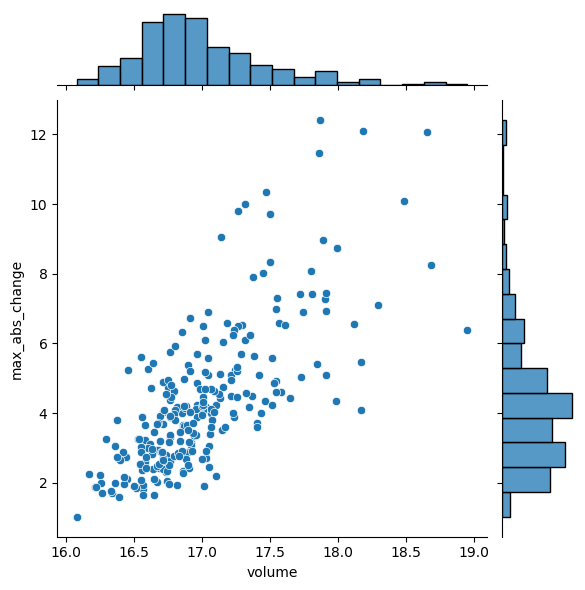

In [40]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

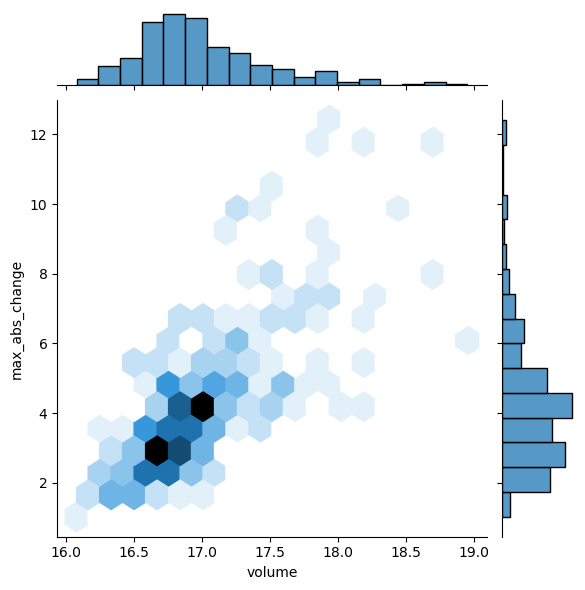

In [42]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

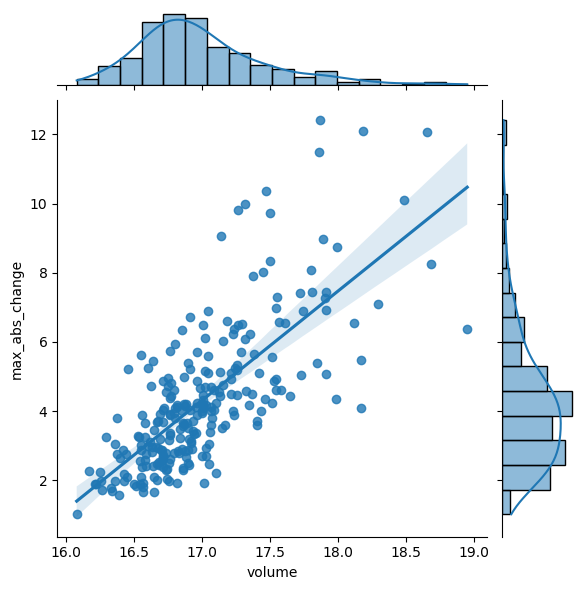

In [44]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we pass kind='resid' , we get the residuals from the aforementioned regression:

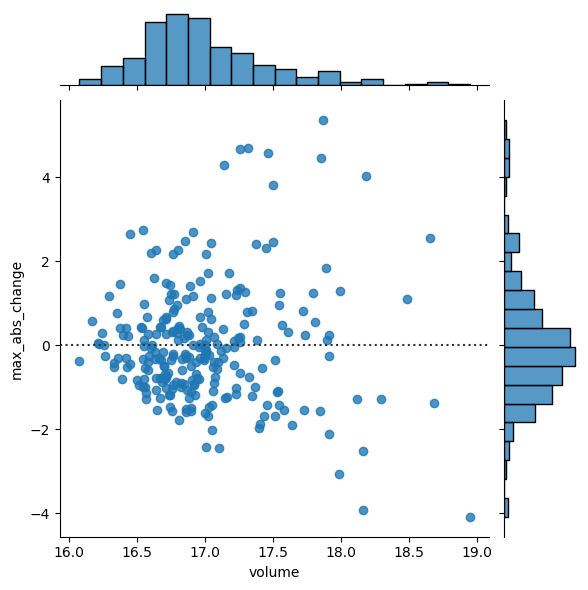

In [46]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Finally, if we pass kind='kde' , we get a contour plot of the joint density estimate with KDEs along the sides:

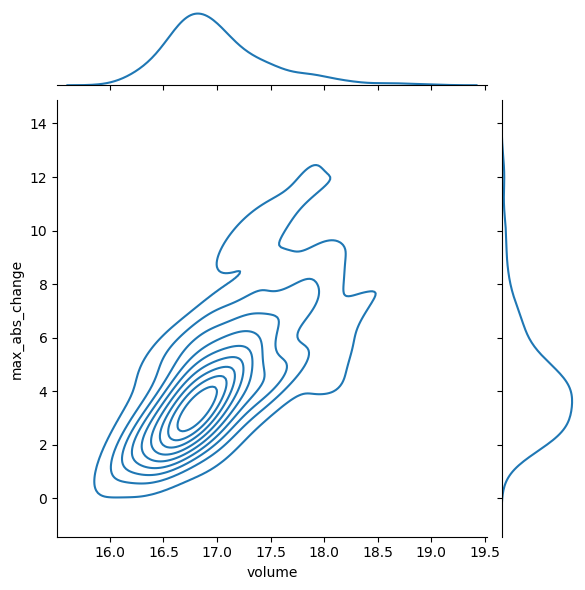

In [49]:

sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

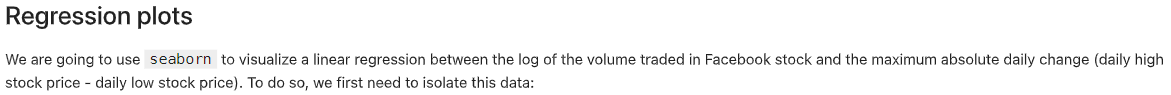

In [51]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy
in Python with itertools , so let's import it

In [53]:
import itertools

itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [56]:
iterator = itertools.repeat("I'm an iterator", 1)

for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


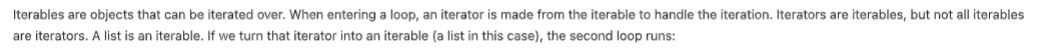

In [ ]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


The reg_resid_plots() function from the reg_resid_plot.py module in this folder uses regplot() and residplot() from seaborn along with itertools to plot the regression and residuals side-by-side:

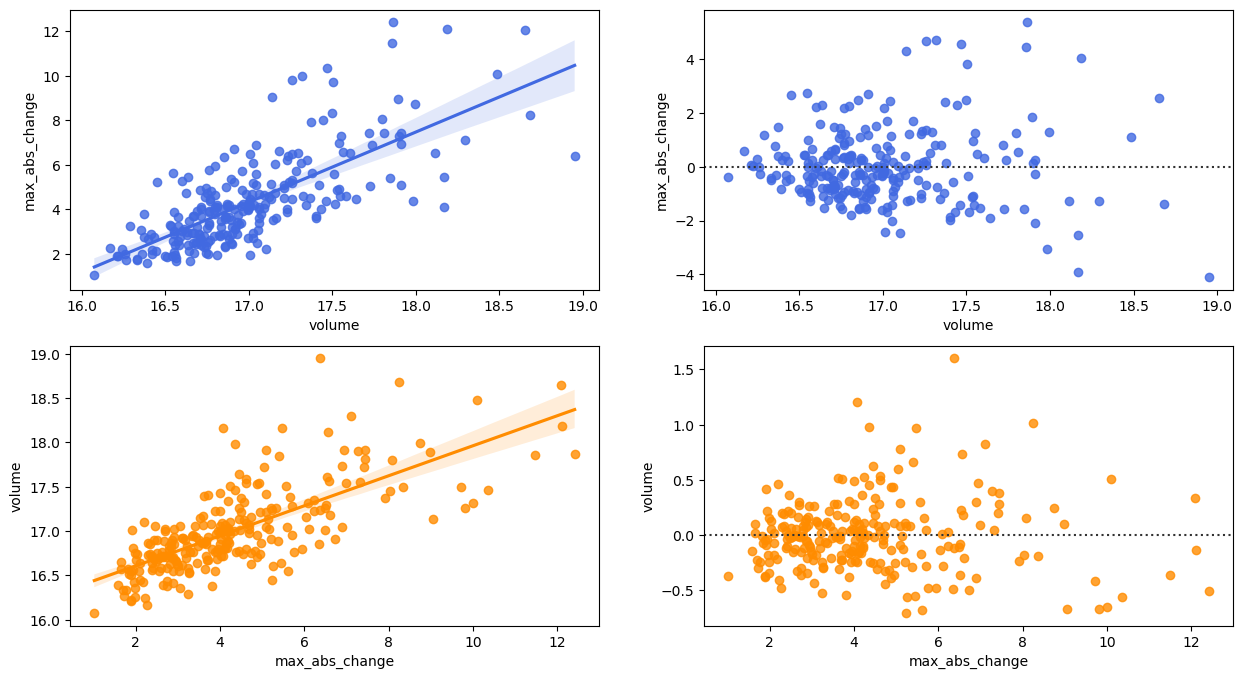

In [62]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

We can use lmplot() to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

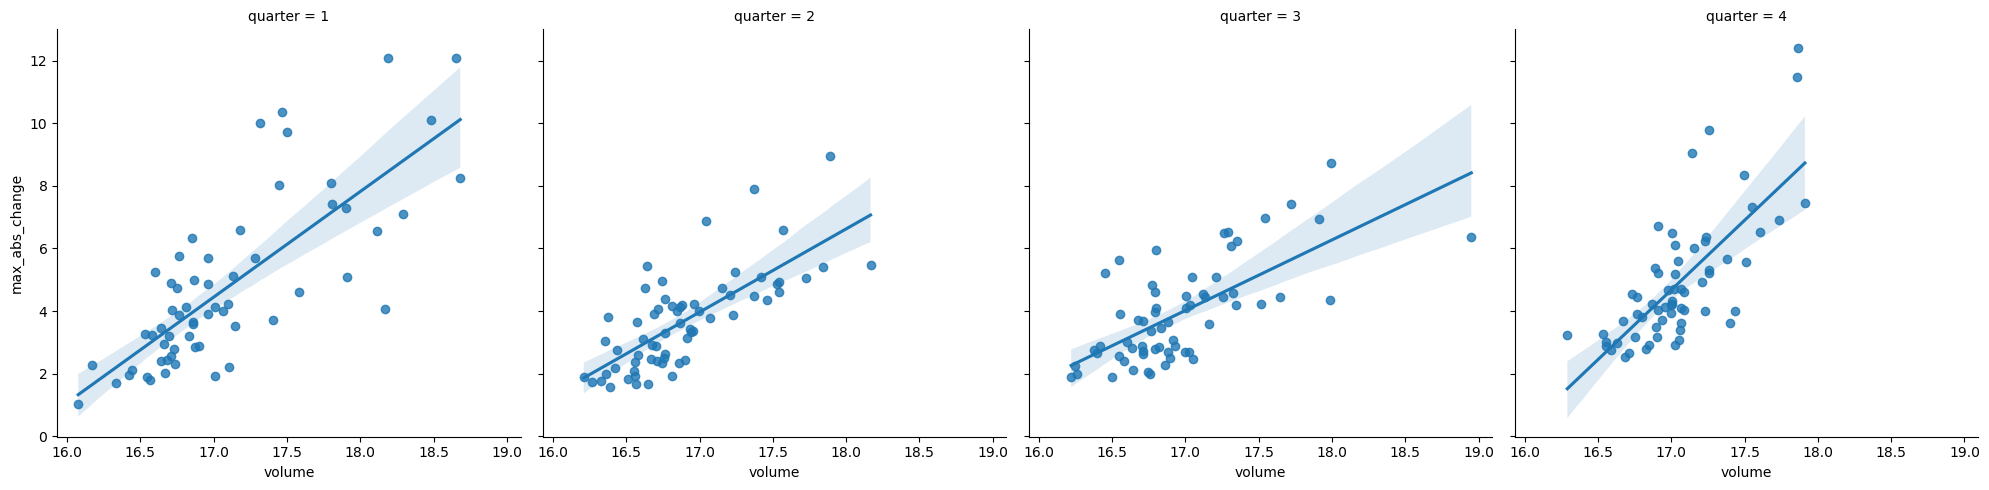

In [74]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

**Distributions**

Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).

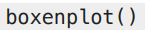

The boxenplot is a box plot that shows additional quantiles:

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

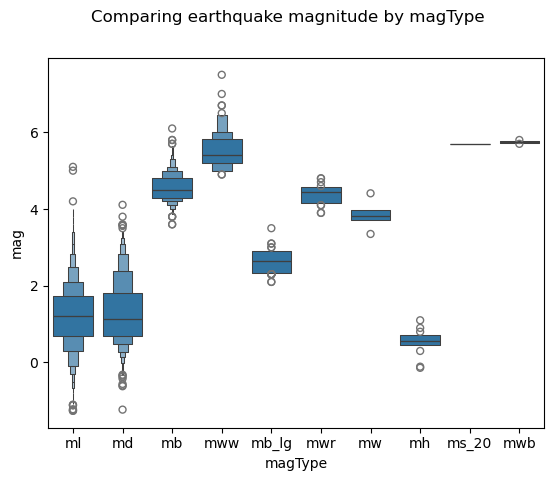

In [80]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

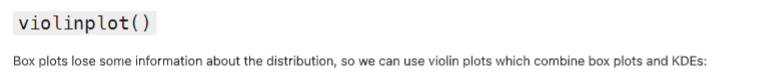

C:\Users\micki\AppData\Local\Temp\ipykernel_11308\897263406.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

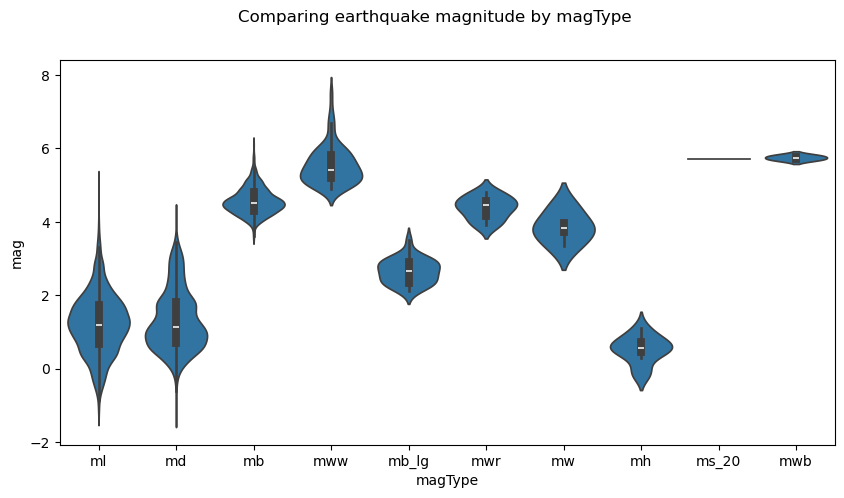

In [82]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

**Faceting**

We can create subplots across subsets of our data by faceting. First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along the
rows and which one along the columns). Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional
arguments).

Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed :


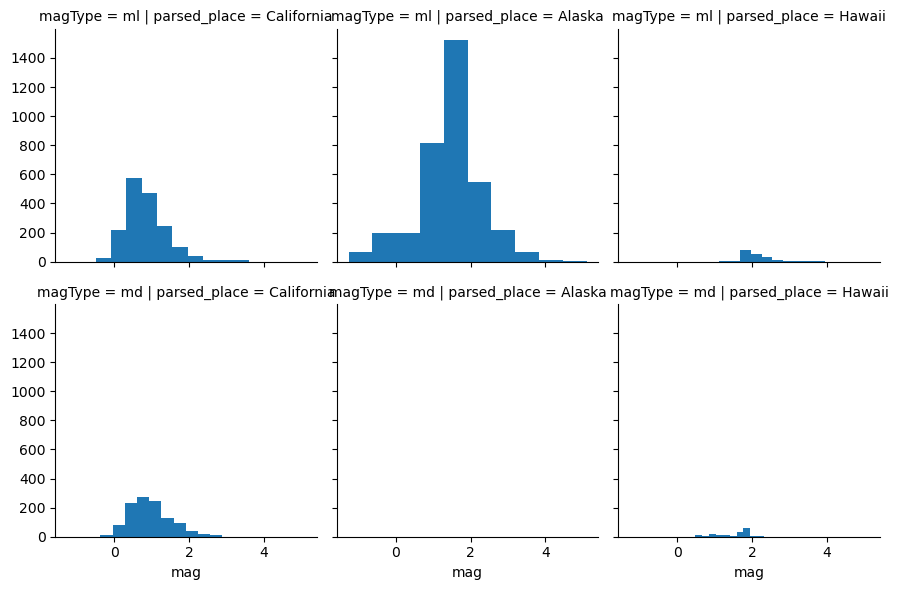

In [85]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California', 'Alaska', 'Hawaii'
        ]))\
        & (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType',
    col='parsed_place'
)
g = g.map(plt.hist, 'mag')

---

### **Formatting Plots**

**About the Data**

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).

#### **Setup**

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

#### **Titles and Axis Labels**

- plt.suptitle() adds a title to plots and subplots
- plt.title() adds a title to a single plot. Note if you use subplots, it will only - put the title on the last subplot, so you will need to use plt.suptitle()
- plt.xlabel() labels the x-axis
- plt.ylabel() labels the y-axis

Text(0, 0.5, 'price ($)')

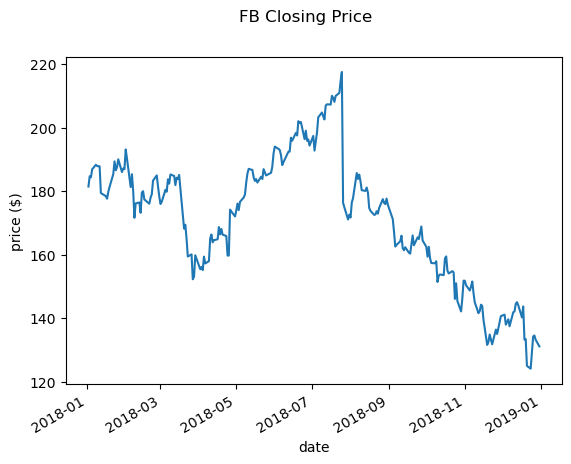

In [102]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')



Check out what happens when we call plt.title() with subplots:

Text(0, 0.5, 'price ($)')

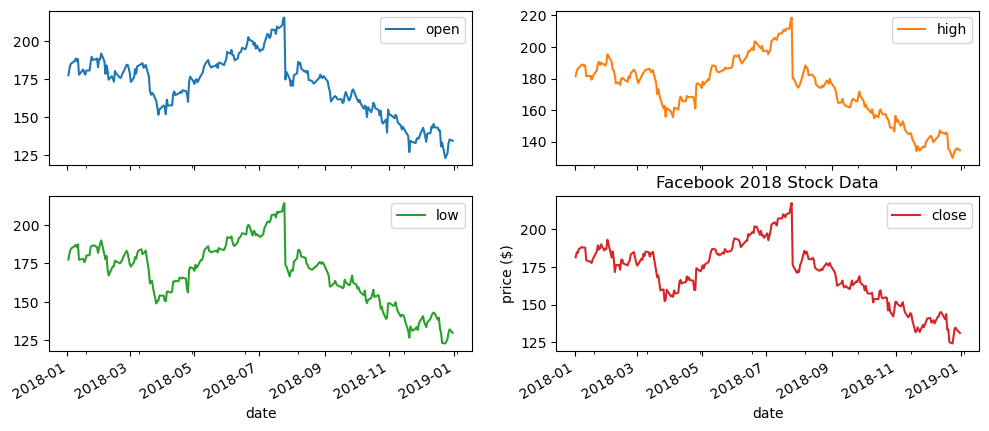

In [105]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Simply getting into the habit of using plt.suptitle() instead of plt.title() will save you this confusion:

Text(0, 0.5, 'price ($)')

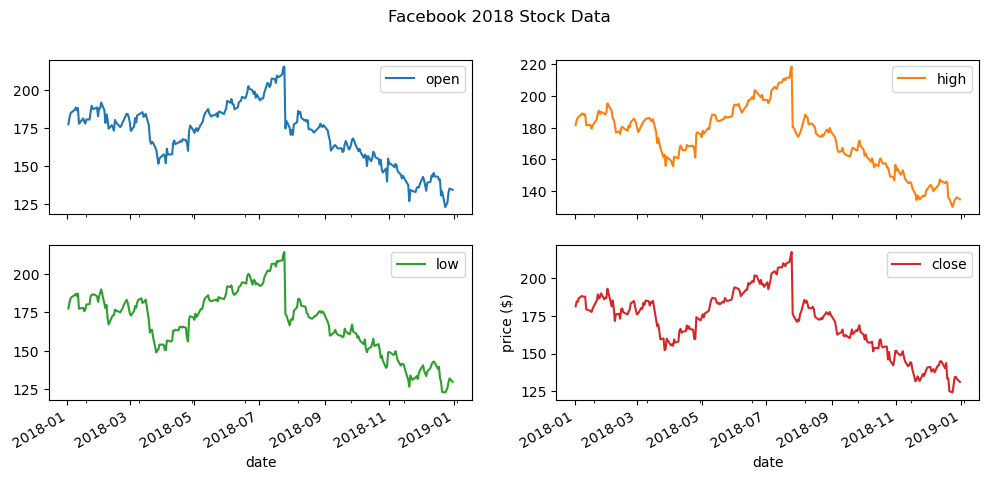

In [108]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

#### **Legends**

plt.legend() adds a legend to the plot. We can specify where to place it with the loc parameter:

Text(0, 0.5, 'price ($)')

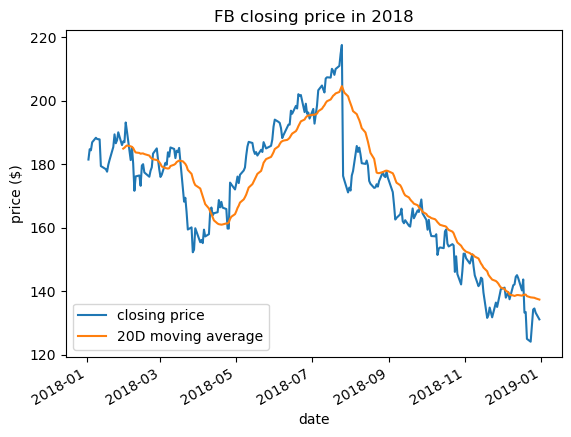

In [111]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

#### **Formatting Axes**

**Specifying axis limits**

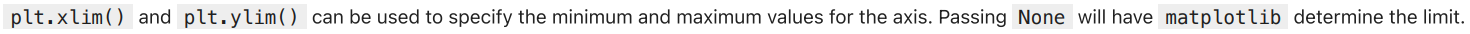

Text(0, 0.5, 'price ($)')

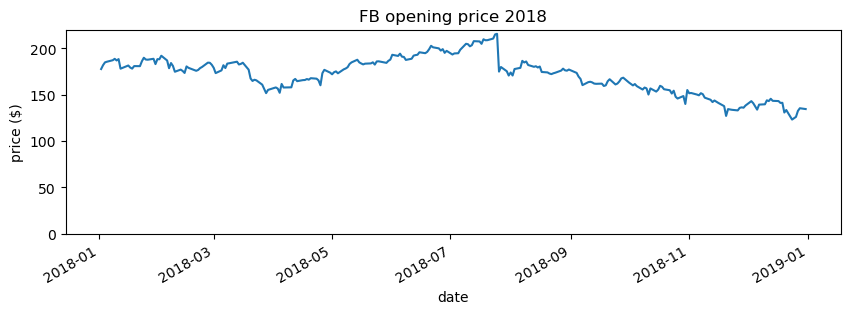

In [114]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

#### **Formatting the Axis Ticks**


Text(0, 0.5, 'price ($)')

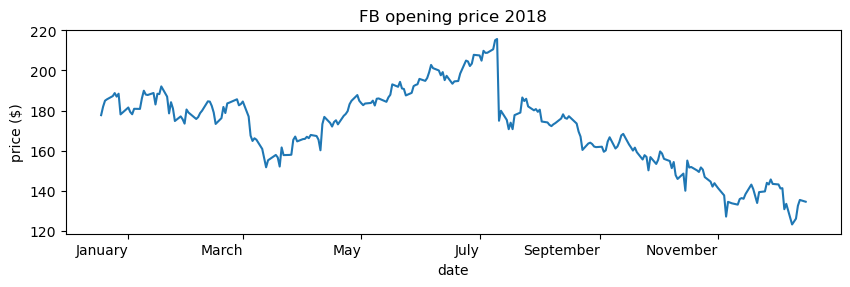

In [123]:
import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs[:6] + 15 , calendar.month_name[1::2])
    # added '[:6]' to match the number of ticks
plt.ylabel('price ($)')

#### 

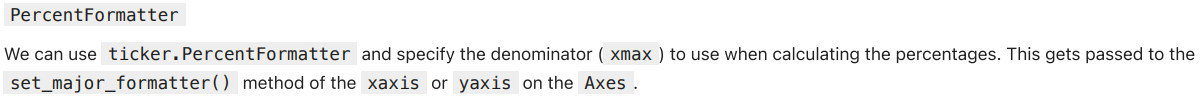

Text(0, 0.5, 'percent of highest price ($218.62)')

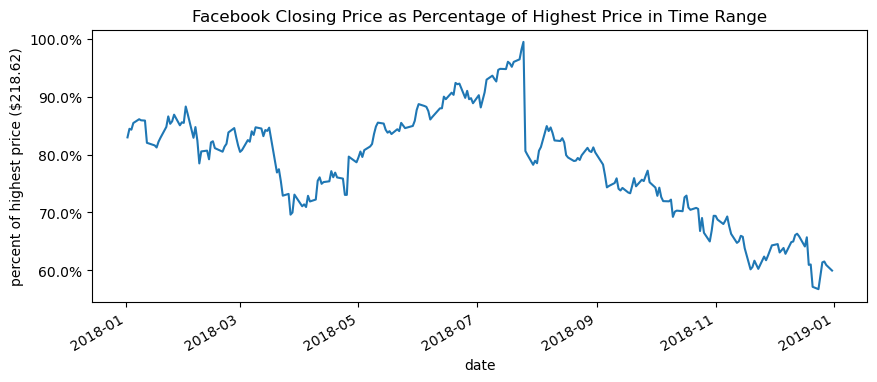

In [128]:
import matplotlib.ticker as ticker

ax = fb.close.plot(
    figsize=(10, 4),
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
    fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

#### 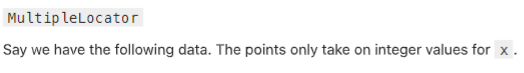

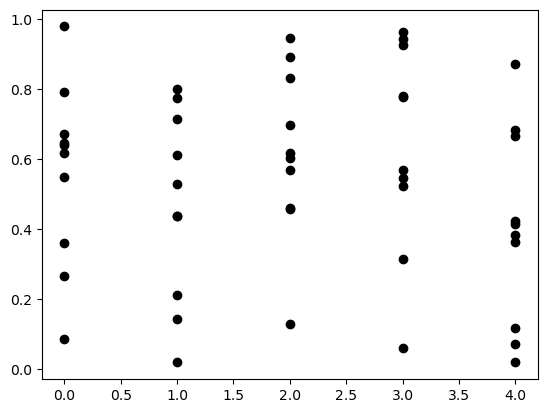

In [131]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

If we don't want to show decimal values on the x-axis, we can use the MultipleLocator . This will give ticks for all multiples of a number specified with the base parameter. To get integer values, we use base=1 :

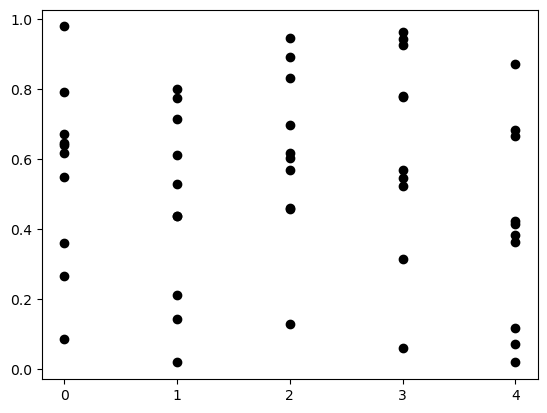

In [134]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1)
)

### **Pandas Plotting Subpackage**

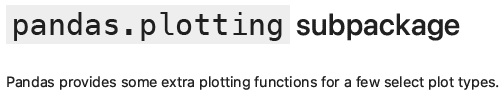

**About the Data**

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).

#### **Setup**

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

#### **Scatter matrix**

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

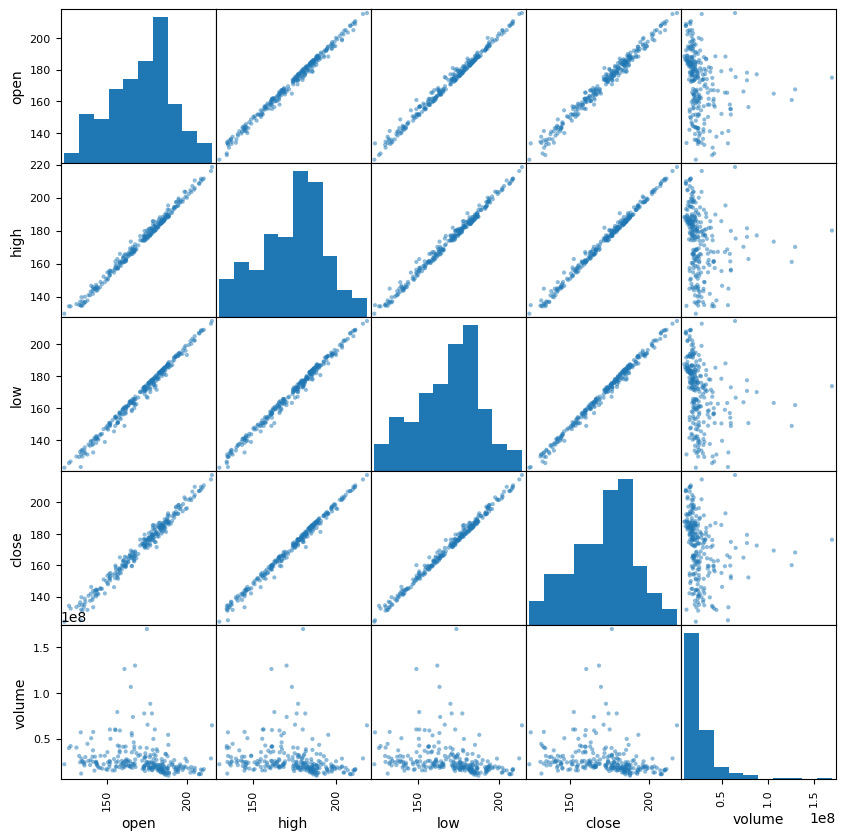

In [144]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

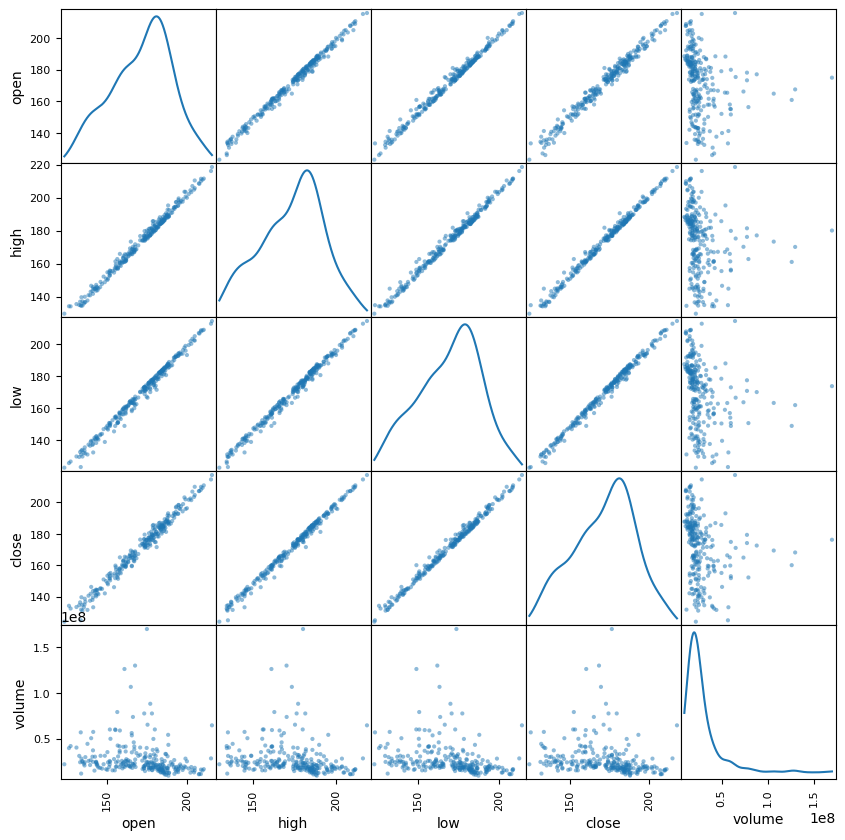

In [146]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

#### **Lag plot**

Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

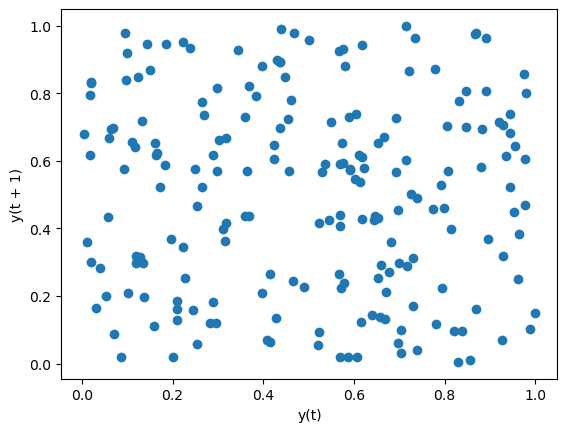

In [149]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

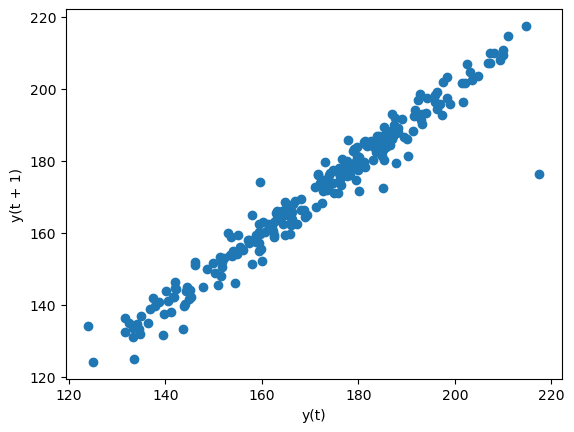

In [152]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

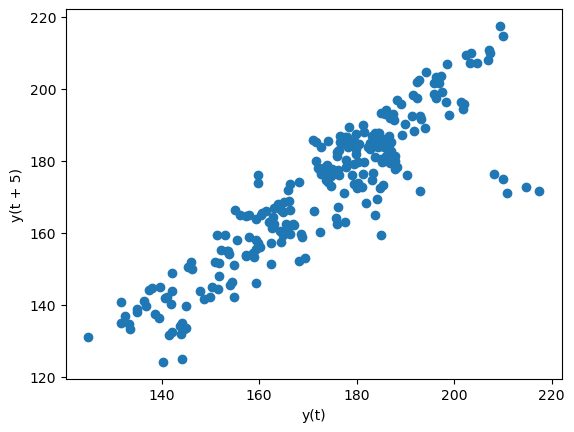

In [155]:
lag_plot(fb.close, lag=5)

#### **Autocorrelation plots**

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

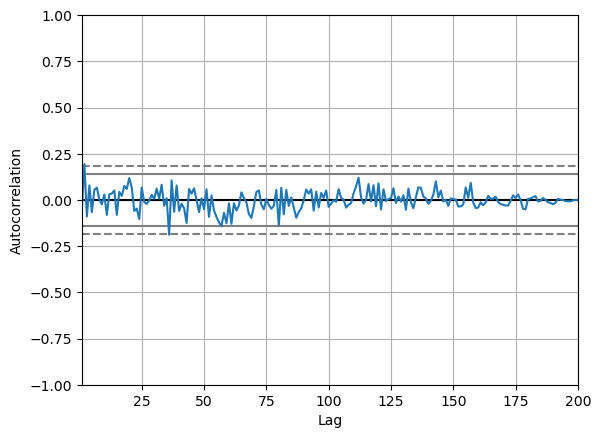

In [158]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

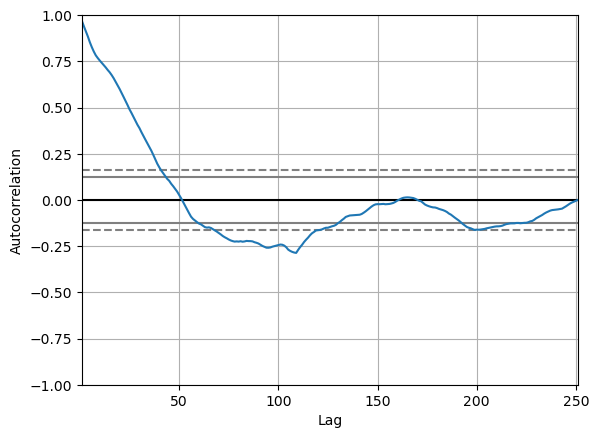

In [161]:
autocorrelation_plot(fb.close)

#### **Bootstrap plot**

This plot helps us understand the uncertainty in our summary statistics:

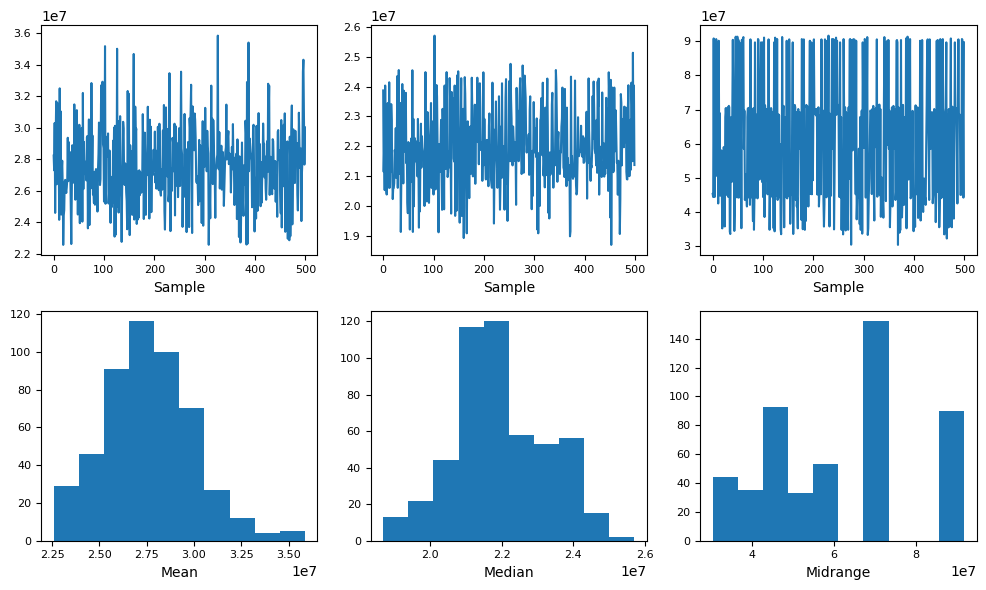

In [164]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

---

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

## **Data Analysis**

> The first procedure discussed using Seaborn to make sense of data through different kinds of plots. I looked at earthquake data and Facebook’s 2018 stock prices using strip plots, swarm plots, and heatmaps to spot patterns and connections. Then, I used jointplots and pairplots to get a better look at how the data was spread out and how variables relate to each other. Regression and residual plots showed us trends and how far off some points were. Lastly, I also learned how to use violin plots, boxen plots, and FacetGrids to compare different groups in the data.

> The second procedure talked about improving the readability and presentation of plots using Matplotlib formatting tools. Some of the key techniques included adding clear titles with suptitle() and proper axis labels, customizing legends for clarity, and adjusting axis limits and tick labels for better scaling and interpretation. Also, there were also Formatter tools introduced like PercentFormatter and MultipleLocator --- which were used to display percentages and control tick intervals, making the visualizations more informative and easier to understand.


## **Supplementary Activity**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

### Task 1
> 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [180]:
# Import all relevant modules
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Read the relevant file (.csv)
quakes = pd.read_csv('earthquakes-1.csv')

Text(0.5, 1.0, 'Correlation Coefficients Between Earthquake Magnitude and Tsunami (magType=mb)')

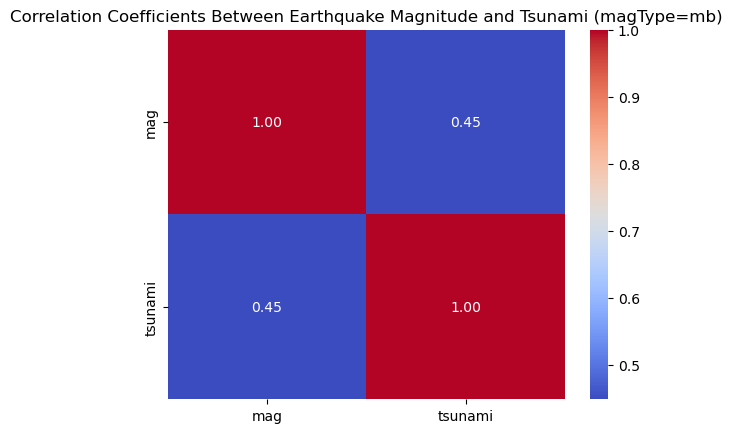

In [196]:
# Filter the magType
mb_earthquakes = quakes[quakes['magType'] == 'mb']

# Check how strongly earthquake magnitude ('mag') is related to tsunami occurrence using correlation
corr_mtx = mb_earthquakes[['mag', 'tsunami']].corr()

# Set-up the heatmap
fig, ax = plt.subplots(figure=(8,6))

sns.heatmap(
    corr_mtx,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    ax=ax
)

ax.set_title('Correlation Coefficients Between Earthquake Magnitude and Tsunami (magType=mb)')


### Task 2
> 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [239]:
# Import relevant modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# Import relevant file(.csv)
fb = pd.read_csv('fb_stock_prices_2018.csv')

> A. Calculate the quartiles and IQR for volume traded and closing prices

In [244]:
# --- Volume ---
volume_quartiles = fb['volume'].quantile([0.25, 0.75])
volume_q1 = volume_quartiles.loc[0.25]
volume_q3 = volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1

# --- Close ---
close_quartiles = fb['close'].quantile([0.25, 0.75])
close_q1 = close_quartiles.loc[0.25]
close_q3 = close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1

> B. Calculate the Tukey fence bounds for volume and closing price

In [247]:
# Calculate the Tukey fence bounds for volume
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr

# Calculate the Tukey fence bounds for closing price
close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr

> C. Set-up the subplots

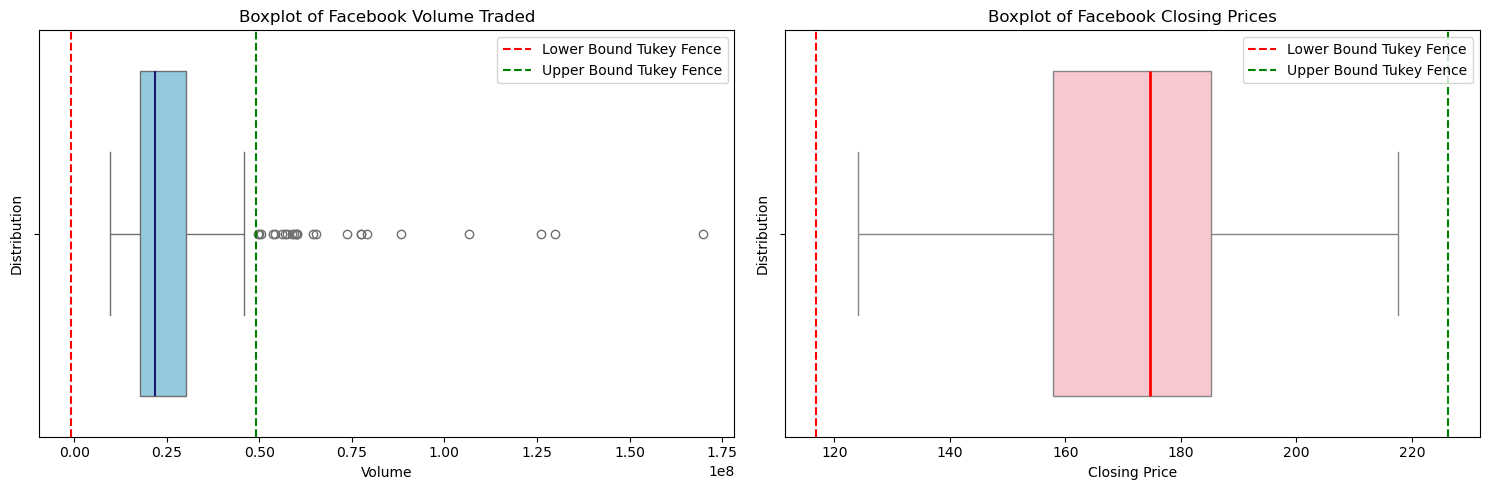

In [291]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# --- Boxplot for Volume ---
sns.boxplot(
    x='volume',
    data=fb, 
    ax=axes[0],
    color='skyblue',
    medianprops=dict(color='midnightblue', linewidth=1.5)
)
axes[0].axvline(
    x=volume_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[0].axvline(
    x=volume_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].set_xlabel('Volume')
axes[0].set_ylabel('Distribution')
axes[0].legend()

# --- Boxplot for Closing Price ---
sns.boxplot(
    x='close',
    data=fb,
    ax=axes[1],
    color='pink',
    medianprops=dict(color='red', linewidth=2)
)
axes[1].axvline(
    x=close_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[1].axvline(
    x=close_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].set_xlabel('Closing Price')
axes[1].set_ylabel('Distribution')
axes[1].legend()

plt.tight_layout()

### Task 3
> 3. Fill in the area between the bounds in the plot from exercise #2.

> A. Modification A: fill the area between the bounds entirely
>
> Observation: the shading tells that data from the right in subplot of volume, are outliers

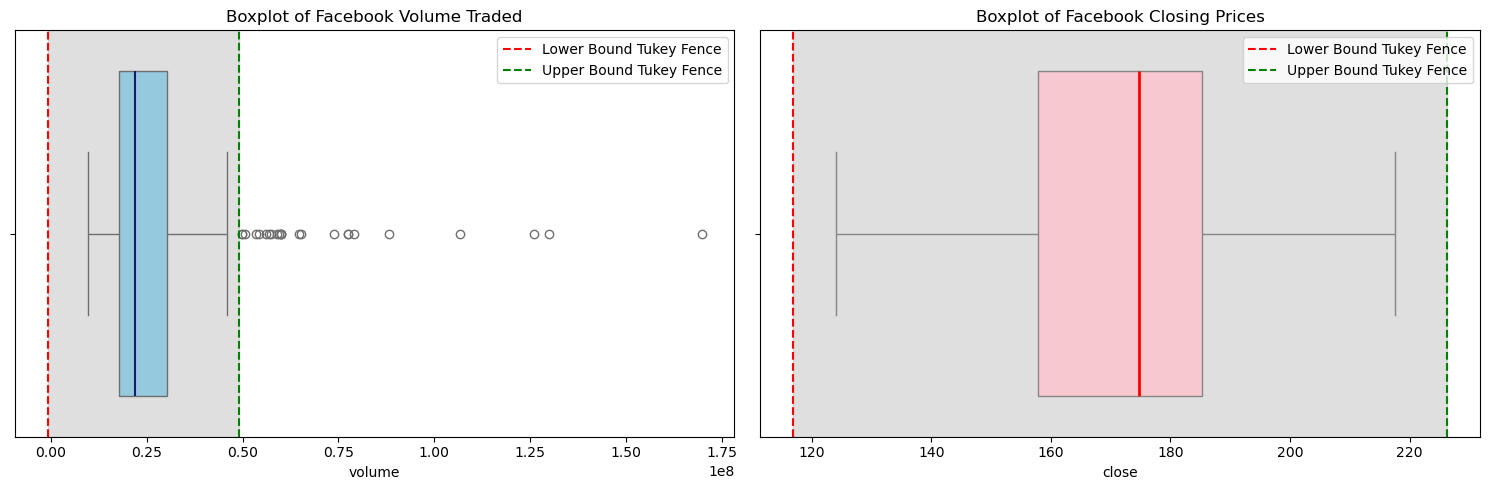

In [301]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# --- Boxplot for Volume ---
sns.boxplot(
    x='volume',
    data=fb, 
    ax=axes[0],
    color='skyblue',
    medianprops=dict(color='midnightblue', linewidth=1.5)
)
axes[0].axvline(
    x=volume_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[0].axvline(
    x=volume_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
# --- Fill between the bounds ----
axes[0].axvspan(
    volume_fence_lower,
    volume_fence_upper,
    color='gray', alpha=0.25)

axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].legend()

# --- Boxplot for Closing Price ---
sns.boxplot(
    x='close',
    data=fb,
    ax=axes[1],
    color='pink',
    medianprops=dict(color='red', linewidth=2)
)
axes[1].axvline(
    x=close_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[1].axvline(
    x=close_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
# Fill between the bounds
axes[1].axvspan(
    close_fence_lower,
    close_fence_upper,
    color='gray',
    alpha=0.25)

axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].legend()

plt.tight_layout()
plt.show()

> B. Modification B: shaded partially by the whiskers

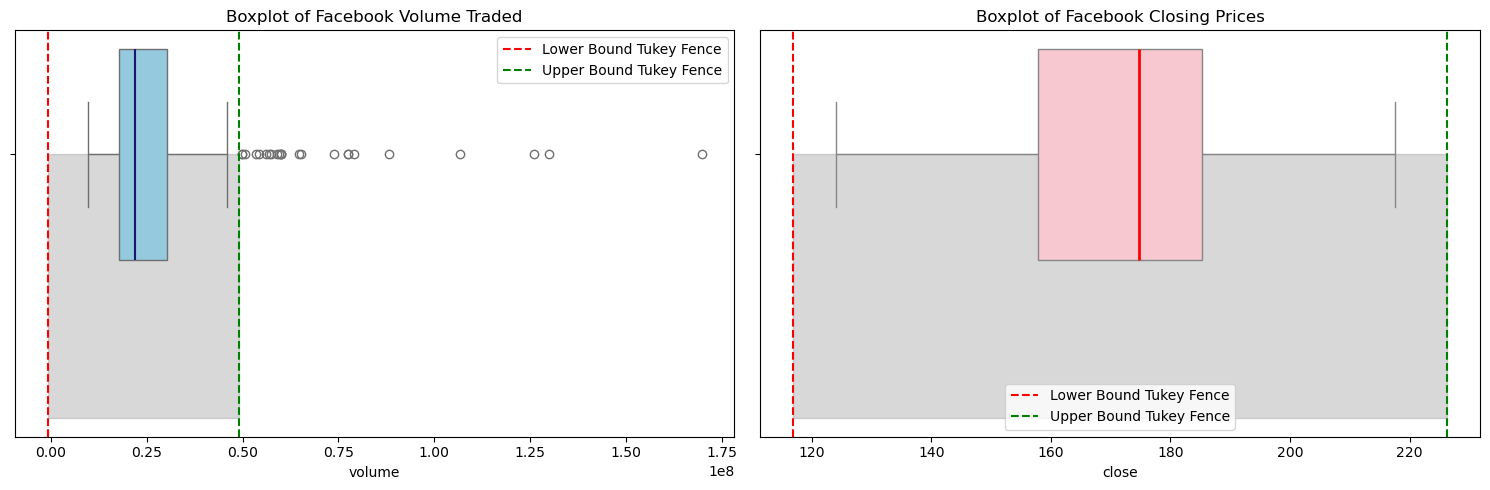

In [299]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# --- Boxplot for Volume ---
sns.boxplot(
    x='volume',
    data=fb, 
    ax=axes[0],
    color='skyblue',
    medianprops=dict(color='midnightblue', linewidth=1.5)
)
axes[0].axvline(
    x=volume_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[0].axvline(
    x=volume_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
# --- Fill between the bounds ----
axes[0].fill_betweenx([0, 1], 
                      volume_fence_lower, 
                      volume_fence_upper, 
                      color='gray', 
                      alpha=0.3)

axes[0].set_title('Boxplot of Facebook Volume Traded')
axes[0].legend()

# --- Boxplot for Closing Price ---
sns.boxplot(
    x='close',
    data=fb,
    ax=axes[1],
    color='pink',
    medianprops=dict(color='red', linewidth=2)
)
axes[1].axvline(
    x=close_fence_lower,
    color='red',
    linestyle='--',
    label='Lower Bound Tukey Fence'
)
axes[1].axvline(
    x=close_fence_upper,
    color='green',
    linestyle='--',
    label='Upper Bound Tukey Fence'
)
# --- Fill between the bounds ---
axes[1].fill_betweenx([0, 1],
                      close_fence_lower,
                      close_fence_upper,
                      color='gray',
                      alpha=0.3)

axes[1].set_title('Boxplot of Facebook Closing Prices')
axes[1].legend()

plt.tight_layout()
plt.show()


### Task 4
> 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

In [375]:
fb_data = pd.read_csv('fb_stock_prices_2018.csv')

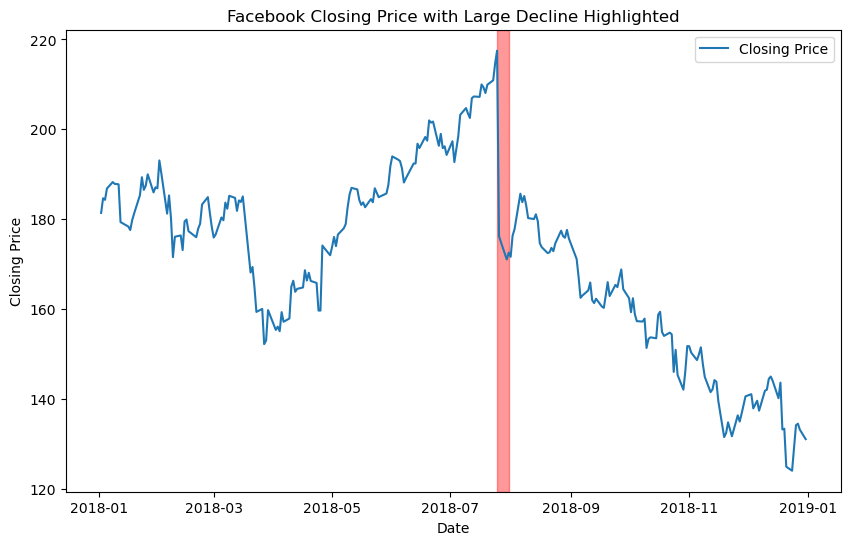

In [377]:
fb_data['date'] = pd.to_datetime(fb_data['date'])
fb_data.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the closing price
ax.plot(fb_data.index, fb_data['close'], label='Closing Price')

# Highlight the decline period with axvspan
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='red', alpha=0.4)

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('Facebook Closing Price with Large Decline Highlighted')

ax.legend()
plt.show()

### Task 5
> 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fb5 = fb_data.copy()

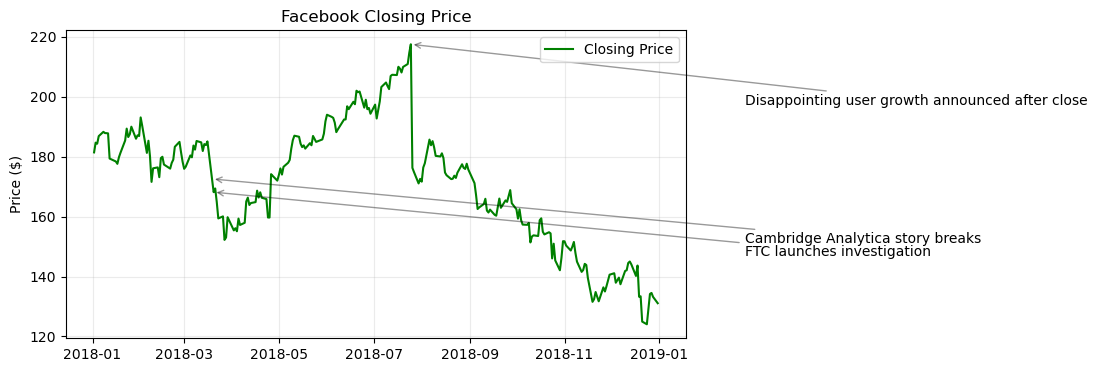

In [492]:
fb_close = fb['close']
events = [
    ('Disappointing user growth announced after close', pd.to_datetime('2018-07-25')),
    ('Cambridge Analytica story breaks', pd.to_datetime('2018-03-19')),
    ('FTC launches investigation', pd.to_datetime('2018-03-20'))
]

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(fb_close.index, fb_close.values, label='Closing Price', color='green')

for event, date in events:
    y_value = fb_close.loc[date]
    jitter = np.random.uniform(-20, -25)  # vertical offset to avois overlap
    ax.annotate(
        event,
        xy=(date, y_value),
        xytext=(pd.Timestamp('2019-02-25'), y_value + jitter),
        arrowprops=dict(arrowstyle='->', alpha=0.4)
    )

ax.grid(True, alpha=0.25)
ax.set_ylabel('Price ($)')
ax.set_title('Facebook Closing Price')
ax.legend()

plt.show()

### Task 6
> 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [99]:
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

In [108]:
fb

open    high       low   close    volume
date                                                  
2018-01-02  177.68  181.58  177.5500  181.42  18151903
2018-01-03  181.88  184.78  181.3300  184.67  16886563
2018-01-04  184.90  186.21  184.0996  184.33  13880896
2018-01-05  185.59  186.90  184.9300  186.85  13574535
2018-01-08  187.20  188.90  186.3300  188.28  17994726
...            ...     ...       ...     ...       ...
2018-12-24  123.10  129.74  123.0200  124.06  22066002
2018-12-26  126.00  134.24  125.8900  134.18  39723370
2018-12-27  132.44  134.99  129.6700  134.52  31202509
2018-12-28  135.34  135.92  132.2000  133.20  22627569
2018-12-31  134.45  134.64  129.9500  131.09  24625308

[251 rows x 5 columns]

In [114]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every combination of 2 columns
    in the data.

    Parameters:
    - data: A pandas DataFrame

    Returns:
    A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    combination_count = num_cols * (num_cols - 1) // 2

    if combination_count == 0:
        raise ValueError("Data must have at least 2 columns to plot combinations.")

    fig, ax = plt.subplots(
        combination_count,
        2,
        figsize=(15, 4 * combination_count)
    )

    ax = ax.reshape(combination_count, 2)

    colormap = cm.get_cmap('tab10', combination_count)
    colors = [colormap(i) for i in range(combination_count)]

    for i, ((x, y), axes) in enumerate(zip(itertools.combinations(data.columns, 2), ax)):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=colors[i])
            subplot.set_title(f"{func.__name__} - {x} vs {y}")

    plt.tight_layout()
    plt.close()
    return fig

C:\Users\micki\AppData\Local\Temp\ipykernel_28920\989057802.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', combination_count)


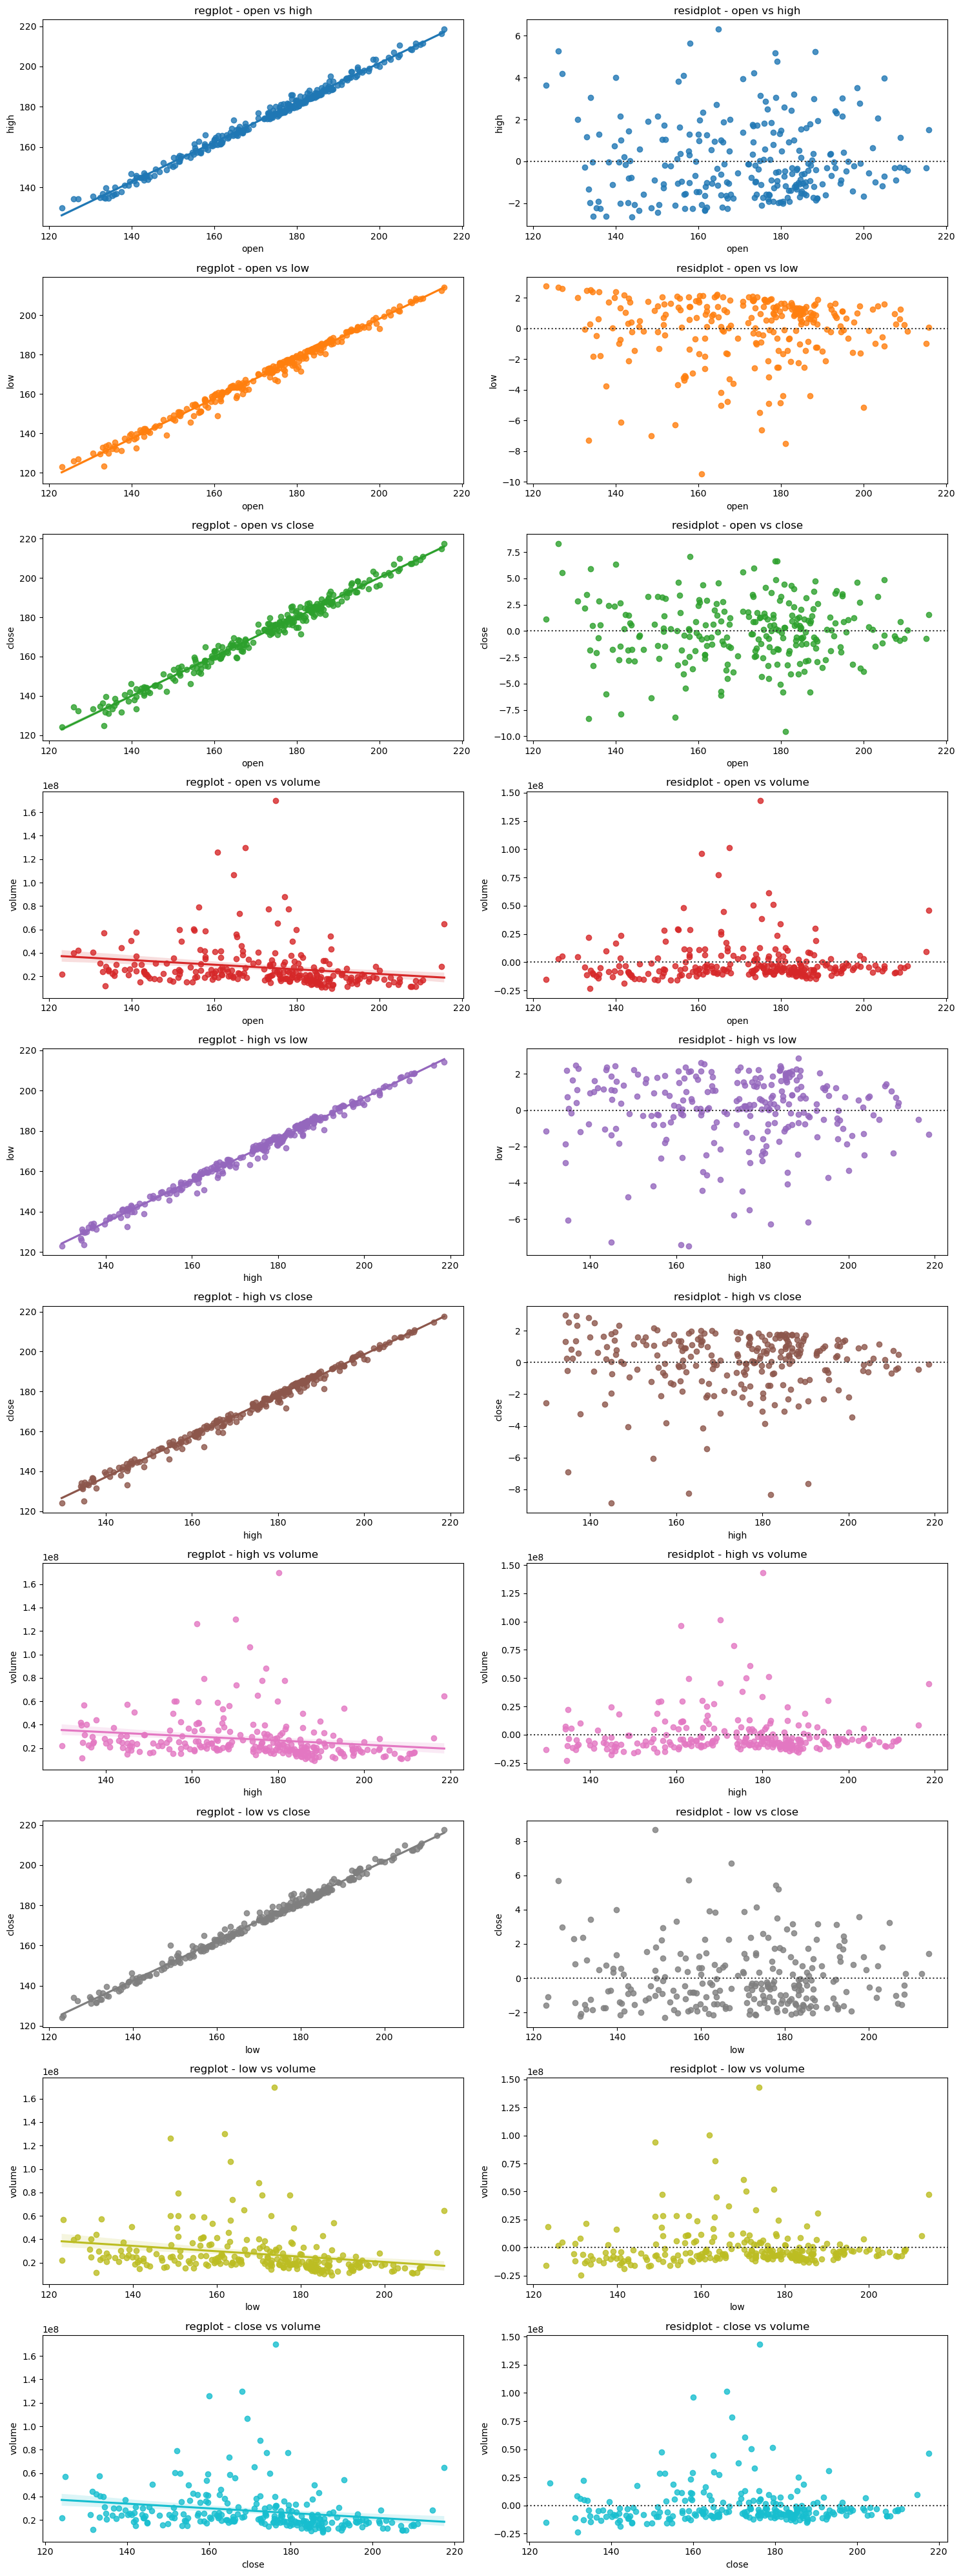

In [116]:
# tRY
reg_resid_plots(fb)

---

## **Conclusion**

> In this activity, I explored different ways to visualize data using Seaborn and Matplotlib. I learned how to use various plots to discover patterns, trends, and relationships in datasets like earthquake records and Facebook stock prices. One key takeaway for me was realizing how visualizations can make data feel understandable, especially when trying to explain real-world events through graphs. A second personal insight was that formatting graphs is a real challenge, like I did with the last supplementary activity involving the reg_resid_plot. It really super challenged me, especially my capability in coding, but I tried to atleast stick with the 'norms' and styles of coding from previous numbers. Lastly, I saw how much clarity and communication can the combination of seaborn and matplotlib do in creating visuals. This is important in creating a well-formatted graph, and I thinks that's is important in conveying analysis. Overall, this activity showed me how powerful Seaborn is, and that with more hands-on practice, I can start creating more meaningful visual stories.

---